[Dive into Deep Learning / KUBIG Fall Session]

#Convolutional Neural Network

본 ipynb는 Convolutional Neural Network를 실제로 어떻게 구현하는지에 대한 Notebook입니다. Convolutional Neural Network의 연산이 실제로 어떻게 구현되는지 Forward를 간단하게 구현하고, Backward 연산에 대해 알아봅니다.

더불어, CIFAR Dataset을 활용하여 실제 Convolutional Neural Network를 간단하게 학습시켜 보고, Class 및 nn.Sequential을 어떻게 구성하는지 실제를 볼 예정입니다. 그리고 해당 CNN의 layer들이 가지는 의미는 무엇인지, BlackBox처럼 보이는 Deep Learning의 해석적인 측면도 들여다 볼 예정입니다.

*본 Notebook은 cs231n assignment와 pytorch tutorial을 참고하였으며, 교육 목적으로 제작되었습니다.

In [ ]:
#Setup
import torch
import torchvision
from torchvision.transforms import ToTensor
import numpy as np
import matplotlib.pyplot as plt


#Batch Size를 원하는 대로 고를 수 있습니다. 통상적으로 Mini-Batch Size는 Computational Capacity를 고려하여 결정합니다(GPU Ram 등)
batch_size = 8
#torch에서 기본적으로 제공해주는 dataset은 CIFAR10 Dataset을 활용하겠습니다.아래 classes 튜플에서 볼 수 있는 것처럼, 10개의 classes를 구분하는 image classification 문제입니다.
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True,transform=ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True,transform=ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

dataiter = iter(trainloader)
images,labels=dataiter.next()
for j in range(4):
  plt.imshow(np.transpose(images[j].numpy(), (1, 2, 0)))
  plt.title(classes[labels[j]])
  plt.show()


#Convolutional Neural Network: Naive Forward Pass

오늘 배운 "Convolution"의 정의를 활용하여, Numpy만을 활용하여 Naive Forward Pass를 구현해보는 것이 목표입니다. 합성곱을 활용해서 Filter와 Image Tensor 간의 Dot Product를 구현해봅시다. 특히 행렬 계산 특성상 '차원'에 대한 개념이 정말 중요합니다. Dot product나 입력 Tensor에 대해 차원을 조절해보는 과정이 필요합니다.

In [ ]:
def conv_forward_naive(x, w, b, conv_param):
    """
    Convolution에 대한 정말 Naive한 한 층 layer를 구현해볼 예정입니다. Computational efficiency에 대해서는 고민 안하셔도 됩니다.

    N개의 이미지 개수, C개의 Color channel, H의 높이와 W의 너비로 입력이 구성되어 있습니다.
    또한 Filter의 경우, 필터 개수 F개와, C개의 Color Channel, HH의 필터 높이와 WW의 필터 너비로 이루어져 있습니다.

    입력 사이즈:
    - x: (N, C, H, W)
    - w: 필터 가중치 (F, C, HH, WW)
    - b: Biases (F,)
    - conv_param: 딕셔너리로 구성된 Convolution 관련 파라미터
      - 'stride': 수직/수평 방향으로 한번에 필터가 움직이는 픽셀 수
      - 'pad': 입력 이미지 주변에 특정 상수 값으로 Padding

    *패딩을 할 때, 원래 입력을 훼손시켜서는 안되며 Padding은 입력 이미지 주변으로 대칭적으로 되어야합니다.
    *추가로, np.pad 함수를 활용하면 numpy에서도 Padding을 용이하게 할 수 있습니다. 자세한 함수 활용법은 numpy docs를 참고해주세요.
    https://numpy.org/doc/stable/reference/generated/numpy.pad.html

    리턴(튜플):
    - out:  (N, F, H', W'), H'와 W'의 사이즈는 다음과 같습니다.
      H' = 1 + (H + 2 * pad - HH) / stride
      W' = 1 + (W + 2 * pad - WW) / stride
    - cache: (x, w, b, conv_param) Backward 과정에 필요한 값을 담은 cache입니다. (*torch 기준 require_grad로 가져가는 값)
    """
    out = None
    
    # ***** 여기서부터 코드를 구현해주세요 (이 선을 수정/삭제하지 마세요)*****
    
    
            


    # ***** 여기까지만 코드를 구현해주세요 (이 선을 수정/삭제하지 마세요)*****
    
    cache = (x, w, b, conv_param)
    return out, cache

In [ ]:
x_shape = (2, 3, 4, 4)
w_shape = (3, 3, 4, 4)
x = np.linspace(-0.1, 0.5, num=np.prod(x_shape)).reshape(x_shape)
w = np.linspace(-0.2, 0.3, num=np.prod(w_shape)).reshape(w_shape)
b = np.linspace(-0.1, 0.2, num=3)

conv_param = {'stride': 2, 'pad': 1}
out, _ = conv_forward_naive(x, w, b, conv_param)
correct_out = np.array([[[[-0.08759809, -0.10987781],
                           [-0.18387192, -0.2109216 ]],
                          [[ 0.21027089,  0.21661097],
                           [ 0.22847626,  0.23004637]],
                          [[ 0.50813986,  0.54309974],
                           [ 0.64082444,  0.67101435]]],
                         [[[-0.98053589, -1.03143541],
                           [-1.19128892, -1.24695841]],
                          [[ 0.69108355,  0.66880383],
                           [ 0.59480972,  0.56776003]],
                          [[ 2.36270298,  2.36904306],
                           [ 2.38090835,  2.38247847]]]])

def rel_error(x, y):
  """ returns relative error """
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

# 만약 Forward Pass를 정확히 구현하였다면, Correct_out과의 상대적 차이가 e-8와 비슷하거나 작을 것입니다.
print('Testing conv_forward_naive')
print('difference: ', rel_error(out, correct_out))

다음은 해당 Convolution layer에 대한 backward를 naive하게 구현한 것입니다. 연산에 대한 효율성에 대해 고민하기보다는, 해당 신경망의 원리가 어떻게 되는지 행렬 연산만을 활용하여 이해하신다고 생각하면 좋을 것 같습니다.
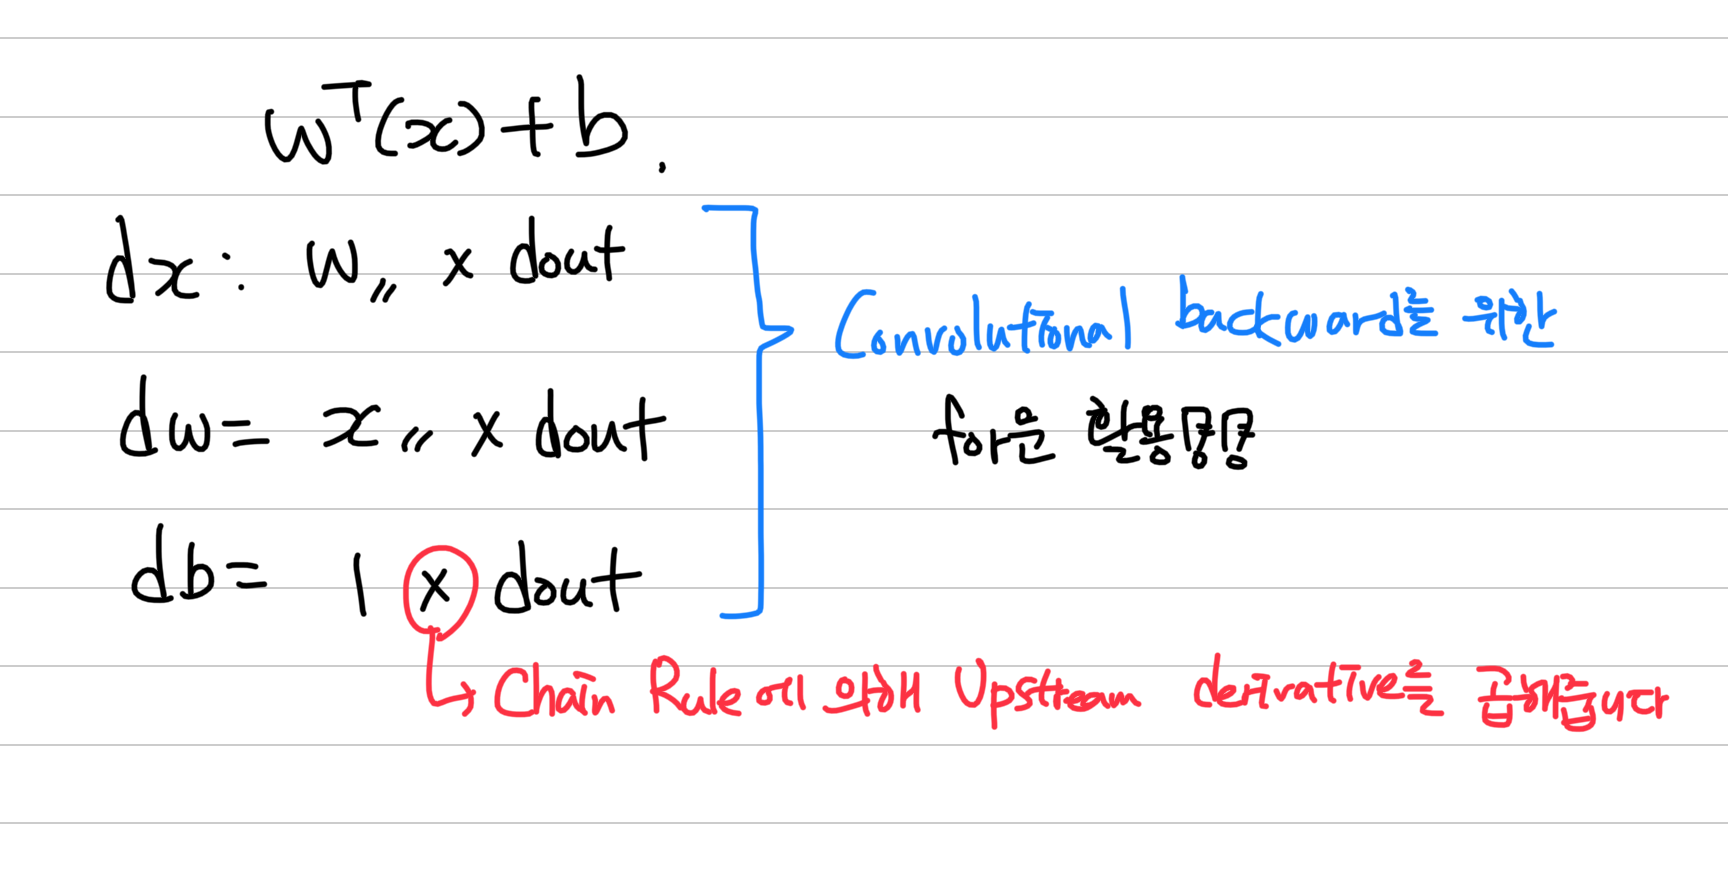

In [ ]:
def conv_backward_naive(dout, cache):
    """
    입력:
    - dout: 이전에 구해졌던 gradient(accumulated)
    - cache: foward_naive에서 구현했던 (x, w, b, conv_param) 

    Returns a tuple of:
    - dx: x에 대한 gradient(image)
    - dw: weight에 대한 gradient
    - db: biases에 대한 gradient
    """
    dx, dw, db = None, None, None
    

    x, w, b, conv_param = cache
    stride = conv_param.get('stride')
    pad = conv_param.get('pad')
    padded_x = (np.pad(x, ((0, 0), (0, 0), (pad, pad), (pad, pad)), 'constant'))

    N, C, H, W = x.shape
    F, C, HH, WW = w.shape
    N, F, H_out, W_out = dout.shape

    #gradient output tensor를 initialize해줍니다.
    dx_temp = np.zeros_like(padded_x)
    dw = np.zeros_like(w)
    db = np.zeros_like(b)

    # db 계산
    # Filter 개수에 대하여 해당 Filter에 걸쳐있는 모든 Tensor들을 합쳐 쌓아주면 됩니다.
    for ff in range(F):
        db[ff] += np.sum(dout[:, ff, :, :])

    # dW 계산.
    # 입력/필터/높이/너비에 대해 각각 for문을 돌려주고, dw tensor를 어떻게 채울지 고민해볼 수 있습니다. Chain Rule에 의하여 dout*x
    for nn in range(N):
        for ff in range(F):
            for jj in range(H_out):
                for ii in range(W_out):
                    dw[ff, ...] += dout[nn, ff, jj, ii] * padded_x[nn,:,jj*stride:jj*stride+HH,ii*stride:ii*stride+WW]

    # dx 계산.
    # 마찬가지로 Chain Rule에 의하여 dout*w.
    for nn in range(N):
        for ff in range(F):
            for jj in range(H_out):
                for ii in range(W_out):
                    dx_temp[nn, :, jj*stride:jj*stride+HH,ii*stride:ii*stride+WW] += dout[nn, ff, jj,ii] * w[ff, ...]

    # dx의 사이즈가 x와 똑같아야 하기에, 원래 사이즈로 조정하기 위하여 padding된 부분을 제거합니다.
    dx = dx_temp[:, :, pad:H+pad, pad:W+pad]

    
    return dx, dw, db

#Pytorch 기반 Classifier 학습하기

Naive한 CNN에 대하여 배웠기 때문에, 본격적으로 실제로 CNN이 어떻게 코드로 돌아가는지 알아봅니다. 여기서도 마찬가지로, Pytorch의 클래스 구현 및, layer들을 같이 구성해보면서 기본적인 CNN Architecture를 구현해봅시다.
나중에는 Pre-tained된 모델을 활용하여 Transfer Learning을 시도하거나, 해당 모델의 클래스를 가져와 조정해보면서 더 좋은 모델을 개발해볼 수도 있습니다.

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class CNNmodel(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        #1 + (H + 2 * pad - HH) / stride
        #위 식을 바탕으로 이미지 input 사이즈에 대한 고민 + max_pooling으로 작아지는 input 사이즈에 대한 고민은 필연입니다.
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120) #Fully-connected layer 1x16*5*5 , 120
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # 배치를 제외한 모든 차원을 평탄화(flatten)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


model = CNNmodel()

In [ ]:
# 음,,, 참고로 저는 self로 구현하는 것보다는 nn.Sequential로 layer를 합쳐서 구현하는게 가독성도 뛰어나고, 직관적인 것 같아 보기도 좋은 것 같습니다.
# 아래 코드는 https://dororongju.tistory.com/147 에서 구현해주신 신경망입니다.
# 참고하시면서, 보시면 될 것 같습니다. 본 ipynb에서는 위에서 구현한 얕은 모델로 학습 진행시키도록 하겠습니다.
class MyNeuralNetwork(nn.Module):
    def __init__(self):
        super(MyNeuralNetwork, self).__init__()

        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=5),
            nn.ReLU(inplace=True), #inplace=True로 설정하면 memory를 조금이나마 덜 먹는다는 장점이 있습니다. 메모리가 부족할 때 활용해보시면 될 것 같아요.
            nn.MaxPool2d(2)
        )

        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=30, kernel_size=5),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2)
        )

        self.layer3 = nn.Sequential(
            nn.Linear(in_features=30*5*5, out_features=128, bias=True),
            nn.ReLU(inplace=True)
        )

        self.layer4 = nn.Sequential(
            nn.Linear(in_features=128, out_features=10, bias=True),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = x.view(x.shape[0], -1)
        x = self.layer3(x)
        x = self.layer4(x)

        return x

Optimizer와 Loss Function을 정의해줍시다.
여기서는 CrossEntropyLoss()와 SGD를 사용하였지만, 저희가 배운 Adam, RMSProp, Adagrad 등 다양한 Optimizer를 사용할 수 있습니다.(물론 SoftmaxLoss와 같이 loss function도 마찬가지 입니다) learning rate나 Momentum도 변화시키면서 더 효율적인 학습 방법도 고민해볼 수 있습니다.

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [ ]:
for epoch in range(3):   # epoch을 설정하여 학습을 반복합니다

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        #Optimizer의 gradient를 으로 초기화
        optimizer.zero_grad()

        # forward/backward/optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step() #gradient를 weight에 sum

        running_loss += loss.item()
        if i % 1000 == 999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 1000:.3f}')
            running_loss = 0.0

print('Finished Training')

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        scores = model(images)
        #가장 높은 probability를 가지는 값을 클래스로 선정
        _, predicted = torch.max(scores.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')


아마 이 기본 CNN 모듈을 돌리면 약 50% 수준의 정확도가 나올 것입니다. 이제 저희의 목표는 이 정확도를 적어도 60% 이상으로 올리는 것을 목표로 합니다.

Learning_rate, Optimizer, CNN 구조, batch_size, epoch 등을 바꾸어보면서 해당 신경망의 성능을 높여봅시다.

*성능이 좋은 신경망은 주로 다음과 같은 전략을 활용합니다
- Batch Normalization(nn.BatchNorm2d) 해당 batch input의 tensor 값을 정규화합니다. 
- Layer Normalization(nn.LayerNorm2d) 해당 layer의 tensor값을 input에 대해 정규화합니다.
- Relu Function(nn.ReLU()) Activation Function 중 가장 유명하게 쓰이는 비선형 함수
- 그 외, AlexNet 과 같은 ImageNet 우승 모델들의 Structure을 참고하면 더 좋은 성능을 내볼 수도 있습니다.(우승인데는 다 이유가,,,있죠 ?)

#Class Visualization

아래의 그림은 타란툴라 그림에 대하여 SQueezeNet의 한 Conv layer에서 Weight를 바탕으로 Gradient argmax한 값입니다. Conv layer가 이미지 인식을 어떤 식으로 하는 지 알 수 있겠나요?
보통 conv layer들은 인간이 사물을 인식하는 방식과 유사한 형식으로 이미지를 인식한다고 weight들을 통해 조사된 바 있습니다만, 아직까지 Deep Learning에 대한 수리적/논리적인 증명은 어렵습니다. 그럼에도 불구하고, 이러한 가중치 조사를 바탕으로 딥러닝 내부에서 어떤 방식으로 Convolution이 진행되며 그 원리는 무엇인지, 간접적으로나마 추론이 가능하겠습니다.

더 정확한 내용을 알고 싶으시다면 다음 논문을 참조해주세요. (Saliency map 관련 논문)

"Deep Inside Convolutional Networks: Visualising Image Classification Models and Saliency Maps"
https://arxiv.org/abs/1312.6034

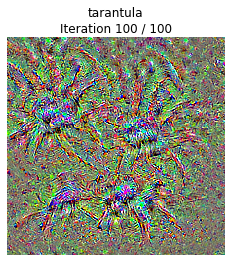